<a href="https://colab.research.google.com/github/4rdnac/Machine-Learning_2025/blob/main/TG11_2341720187_CANDRA_AHMAD_DANI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praktikum 1

## Langkah 1 - Import Library

In [25]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

## Langkah 2 - Membuat Data Dummy

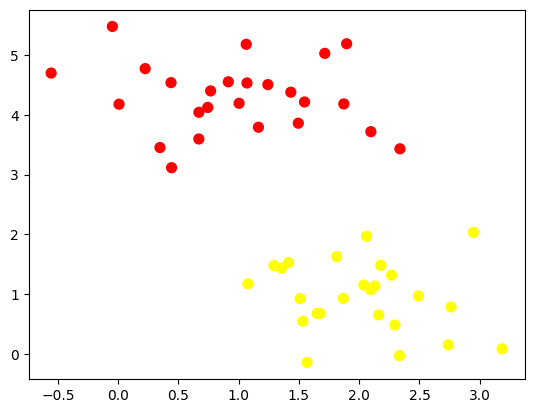

In [26]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

## Langkah 3 - Buat Ilustrasi Garis Pemisah

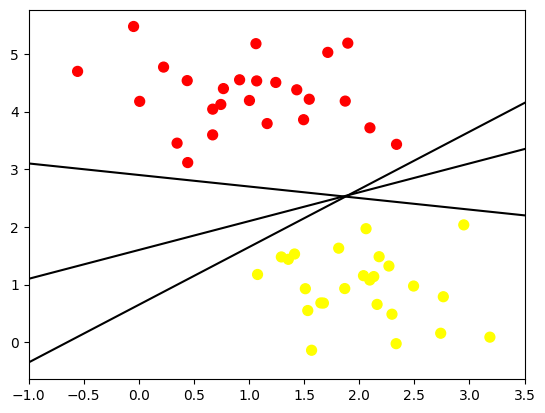

In [27]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)
plt.show()

## Langkah 4 - Ilustrasi Margin

(-1.0, 3.5)

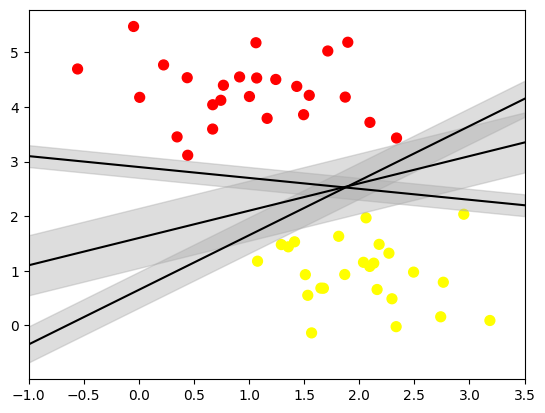

In [28]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

## Langkah 5 - Fitting Model

In [29]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [ ]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

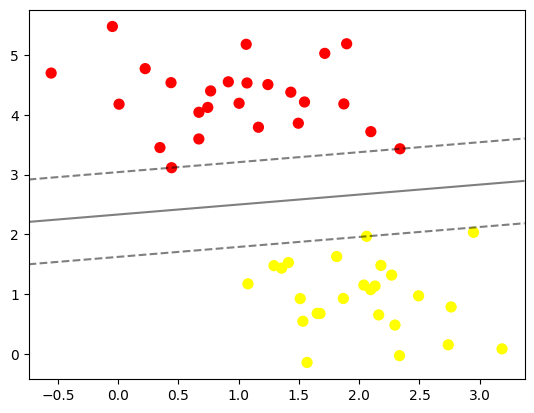

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

In [ ]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

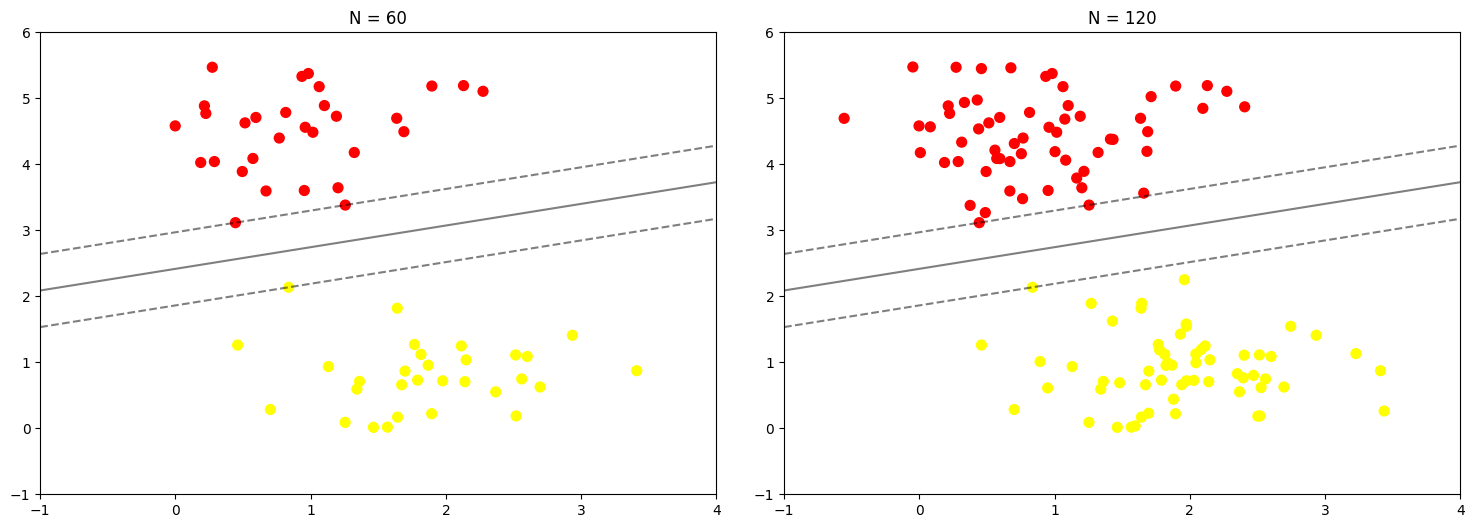

In [ ]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

In [ ]:
# jumlah data dapat dipilih di antara 10 atau 200 buah data, telihat tidak ada perubahan pada model

from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 200], ax=fixed(None))

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

<function __main__.plot_svm(N=10, ax=None)>

In [ ]:
!pip install ipywidgets
!pip install mpl_toolkits

ERROR: Could not find a version that satisfies the requirement mpl_toolkits (from versions: none)
ERROR: No matching distribution found for mpl_toolkits


# Praktikum 2

## Langkah 1 - Ilustrasi Data Non-Linier

In [33]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.svm import SVC

In [34]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

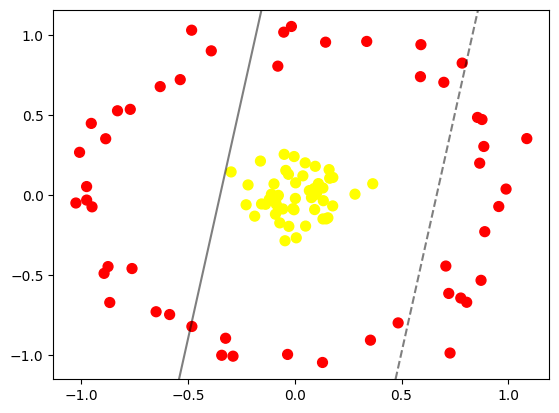

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 5.88694217e-01,  7.37842517e-01],
       [-3.13267650e-03,  2.39350505e-01],
       [ 1.55102475e-01, -1.43043772e-01],
       [-7.69431308e-02, -2.92576486e-03],
       [ 2.80648462e-03, -2.21602191e-02],
       [-8.66097523e-02, -5.87082017e-02],
       [-5.36625730e-01,  7.19444612e-01],
       [-8.74787834e-01, -4.47479294e-01],
       [ 7.07628524e-01, -4.44162278e-01],
       [-8.93370971e-01, -4.89849051e-01],
       [ 8.66262643e-01,  1.97936568e-01],
       [ 1.32059224e-01, -1.50109195e-01],
       [ 9.55647526e-01, -7.25916581e-02],
       [-1.58457597e-02,  1.05120533e+00],
       [-4.97000903e-02,  2.53087378e-01],
       [ 1.29904375e-01, -1.04608139e+00],
       [ 9.30851484e-02, -9.15589708e-02],
       [ 7.21326077e-01, -6.15144327e-01],
       [-9.53334988e-01,  4.46237752e-01],
       [-8.66701754e-01, -6.71685122e-01],
       [-1.36950004e-01, -5.86130751e-02],
       [-1.02540271e+00, -5.07205371e-02],
       [-2.89369931e-01, -1.00675965e+00],
       [ 1.63481884e-01,  1.03988015e-01],
       [-3.61780991e-03, -9.27430864e-02],
       [-1.87720893e-01, -1.32760627e-01],
       [-4.21005336e-02,  1.52679798e-01],
       [ 7.27377927e-01, -9.87094249e-01],
       [ 8.90042959e-01, -2.29615876e-01],
       [-2.96534416e-02,  1.28431826e-01],
       [-9.74928675e-01, -3.24146118e-02],
       [ 1.77582719e-01, -6.87796181e-02],
       [ 3.94339777e-03,  7.52105791e-02],
       [-8.16020774e-02, -9.73959679e-03],
       [ 6.83362670e-02,  2.68738264e-02],
       [ 4.84205925e-01, -7.98990987e-01],
       [-9.73245941e-02,  6.85113127e-02],
       [ 9.59384017e-02,  1.78414572e-01],
       [-7.62473826e-01, -4.59721821e-01],
       [-8.52095328e-03, -8.62727355e-02],
       [ 8.56166154e-01,  4.83404799e-01],
       [-4.83207958e-01,  1.02795525e+00],
       [ 7.77706180e-01, -6.43878962e-01],
       [-4.82053880e-01, -8.21303337e-01],
       [ 6.98247512e-01,  7.02690374e-01],
       [-1.19621552e-01, -2.81209454e-02],
       [ 1.02180177e-01,  1.05532803e-02],
       [-5.86271385e-01, -7.46868860e-01],
       [ 5.90887304e-01,  9.37786660e-01],
       [-7.02509621e-02, -1.74751594e-01],
       [-5.16582169e-02,  1.01568252e+00],
       [ 7.00935386e-03, -2.67979187e-01],
       [-9.75178877e-01,  5.19413385e-02],
       [-3.42214587e-01, -1.00117374e+00],
       [-4.57311387e-02, -2.86354938e-01],
       [-9.06238414e-02, -1.20715216e-01],
       [ 1.47193587e-01, -1.49785793e-01],
       [ 5.06190467e-02, -1.94691427e-01],
       [ 1.60789748e-01,  1.57696785e-01],
       [ 1.31613327e-01,  4.32024247e-02],
       [-2.27972114e-01, -6.16706964e-02],
       [ 9.89763125e-01,  3.63404652e-02],
       [ 1.10654035e-01,  7.03651257e-02],
       [-1.60891248e-01,  2.11186314e-01],
       [ 1.78252161e-01,  1.08795919e-01],
       [-3.37056460e-02, -9.95807437e-01],
       [ 8.76984850e-01,  4.70494817e-01],
       [-1.00819617e+00,  2.65666597e-01],
       [-1.55787454e-01, -5.66522227e-02],
       [ 7.84171334e-01,  8.22636092e-01],
       [ 8.72560864e-01, -5.33267460e-01],
       [ 3.65257886e-01,  6.95483334e-02],
       [-8.30463882e-01,  5.25011705e-01],
       [ 1.44299751e-01,  9.53121118e-01],
       [ 3.78857653e-02,  1.18808899e-01],
       [-7.70648522e-01,  5.33905568e-01],
       [ 8.85603421e-01,  3.02236890e-01],
       [-3.24110605e-01, -8.94951114e-01],
       [ 7.81618772e-02, -1.71216592e-02],
       [-2.18929074e-01,  6.22321365e-02],
       [-6.49651103e-01, -7.29444128e-01],
       [-3.91198517e-01,  8.99071515e-01],
       [-6.30450267e-01,  6.75868829e-01],
       [ 4.88086036e-02,  1.99929714e-01],
       [-7.51218426e-02, -9.07055948e-02],
       [ 3.54524425e-01, -9.06831579e-01],
       [-8.85766964e-01,  3.50460990e-01],
       [-2.98332843e-01,  1.43312295e-01],
       [ 9.03239718e-02,  3.92142667e-02],
       [ 3.37017120e-01,  9.57890017e-01],
       [ 8.05405332e-01, -6.70287081e-01],
       [ 1.33706324e-01, -3.63127100e-02

In [35]:
# contoh data tidak terpisah secara linier
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180),
         X=fixed(X), y=fixed(y))


## Langkah 2 - Fitting Model

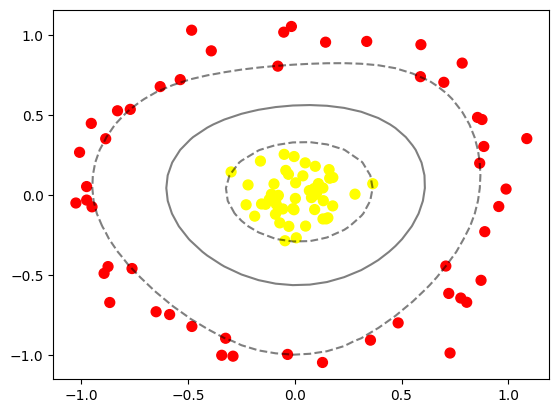

In [36]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

# Praktikum 3

## Langkah 1 - Import Library dan Buat Fungsi Plotting

In [37]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

## Langkah 2 - Buat Data Dummy

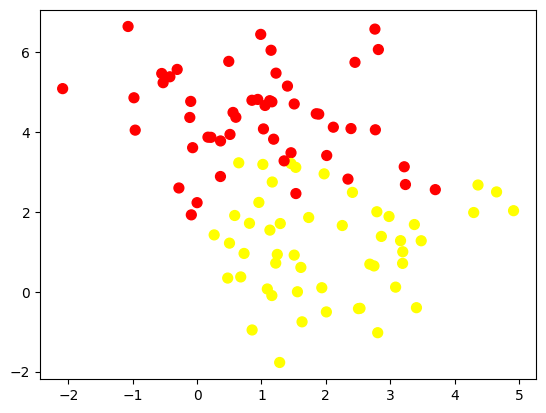

In [38]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

## Langkah 3 - Analisis Dampak Tunning

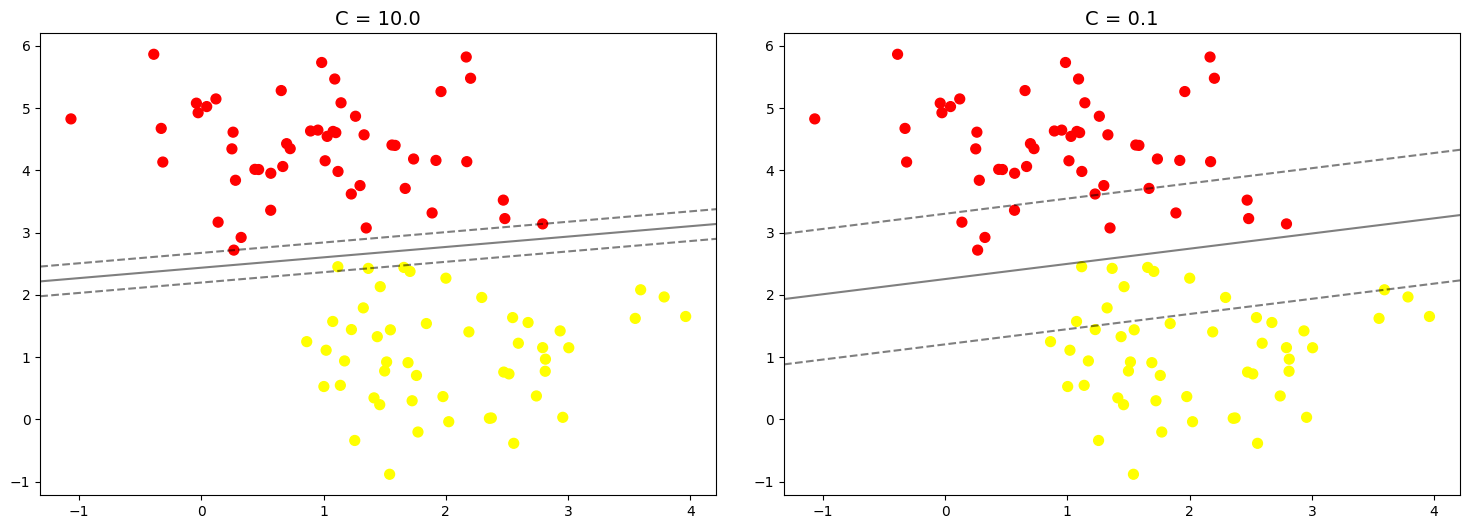

In [39]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

# Praktikum 4

## Langkah 0 - Unduh Dataset

In [1]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(len(faces.target_names))
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
8
(1348, 62, 47)


## Langkah 1 - Inspeksi Citra Wajah

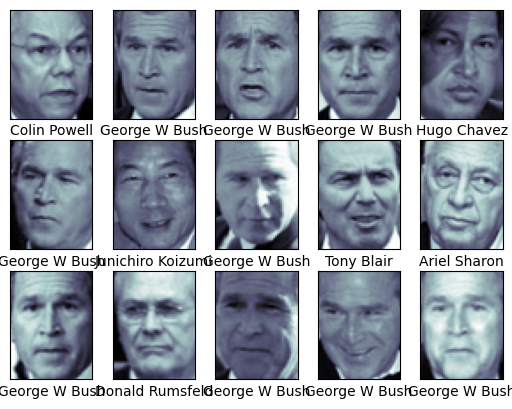

In [2]:
# contoh wajah yang digunakan
from matplotlib import pyplot as plt

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

## Langkah 2 - Pra Pengolahan Data

In [3]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')

# Pipeline digunakan untuk melakukan proses secara bertahap dalam
# 1 eksekusi fungsi secara langsung
model = make_pipeline(pca, svc)

## Langkah 3 - Split Data

In [4]:
# pemisahan data training dan data testing

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

Langkah 4 - Pembuatan Model + Tunning

In [5]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)
print(grid.best_score_)

model = grid.best_estimator_
yfit = model.predict(Xtest)

CPU times: user 2min 1s, sys: 126 ms, total: 2min 1s
Wall time: 1min 27s
{'svc__C': 5, 'svc__gamma': 0.001}
0.828893332683022


## Langkah 5 - Cek Hasil Prediksi

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

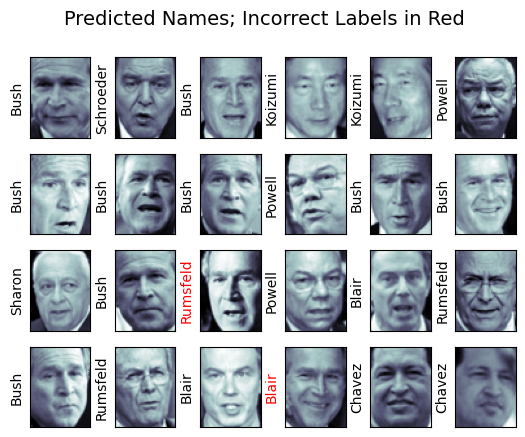

In [6]:
# hasil label pada data testing

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

## Langkah 6 - Cek Performansi

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



Text(113.92222222222219, 0.5, 'predicted label')

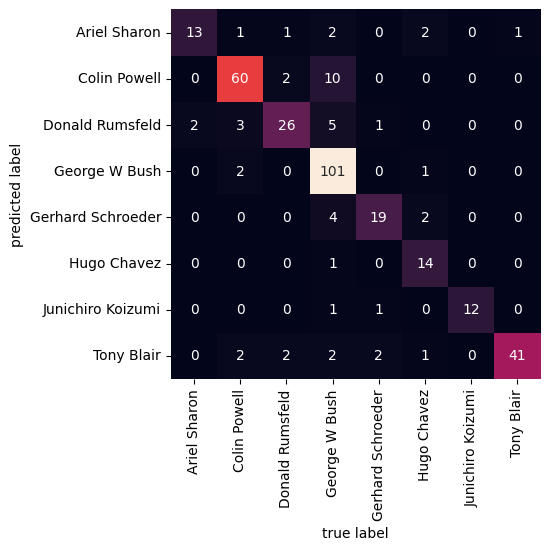

In [7]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))
# bentuk confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

Text(113.92222222222219, 0.5, 'predicted label')

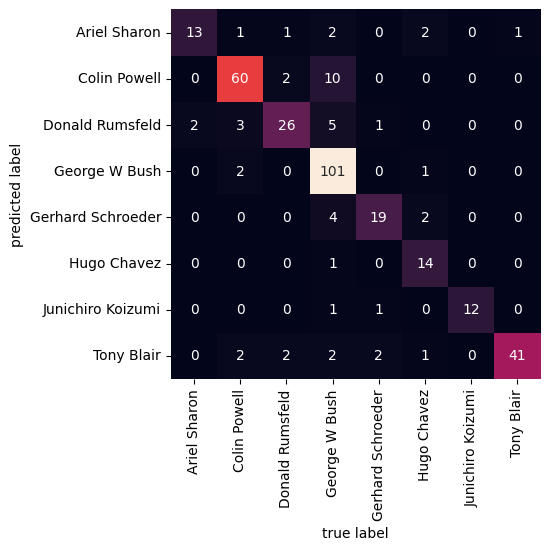

In [8]:
# bentuk confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

## Praktikum 5

In [9]:
# Import Required Libraries
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd

In [11]:
#akses drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
# Image directories
train_dir = "/content/drive/MyDrive/MachineLearning/images/training"
test_dir = "/content/drive/MyDrive/MachineLearning/images/test/"

## Langkah 1 - Load Data dan Visualisasikan

Image 77
(889, 1280, 3)
Shape	: (737, 1024, 3)
Label	: night


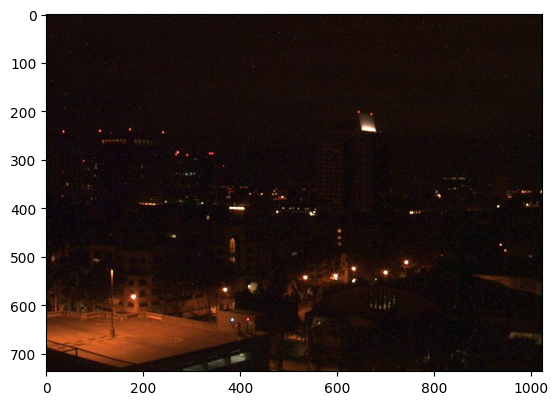

In [14]:
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if not img is None:
                img_list.append((img, label))

    return img_list

# Load training data
train_img = load_dataset(train_dir)

# Check the first data
# It should be a tuple consist of arrays of image and image labels
train_img[0]

# Random size checking
pick_random = np.random.randint(0, len(train_img))

# Check img size
print(f'Image {pick_random}')
print(train_img[pick_random][0].shape)

# Function to Visualize
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))

    img = img_list[rand_num][0]
    label = img_list[rand_num][1]
    label_str = 'day' if label == 1 else 'night'

    plt.imshow(img)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label}')

random_img_viz(train_img)

## Langkah 3 - Pra Pengolahan Data

Image 168
(600, 1100, 3)
Shape	: (439, 640, 3)
Label	: night


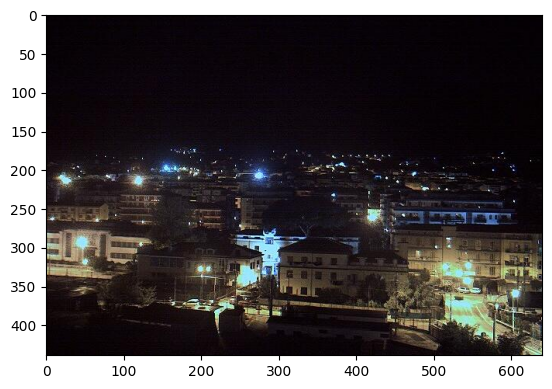

In [15]:
def standarized_input(image):
    # resize to w: 1100, h:600
    std_img = cv2.resize(image, (1100,600))

    return std_img

def label_encoder(label):
    # Encode the label
    # day as 1; night as 0
    num_val = 0

    if(label == 'day'):
        num_val = 1

    return num_val

def preprocess(img_list):
    std_img_list = []

    for item in img_list:
        image = item[0]
        label = item[1]

        # Standarized the image
        std_img = standarized_input(image)

        # Create the label
        img_label = label_encoder(label)

        std_img_list.append((std_img, img_label))

    return std_img_list

train_std_img_list = preprocess(train_img)

# Random size checking
pick_random = np.random.randint(0, len(train_std_img_list))

# Check img size
print(f'Image {pick_random}')
print(train_std_img_list[pick_random][0].shape)

random_img_viz(train_img)

Langkah 4 - Ekstraksi Fitur

Image 133
Avg Brighness: 48.4205


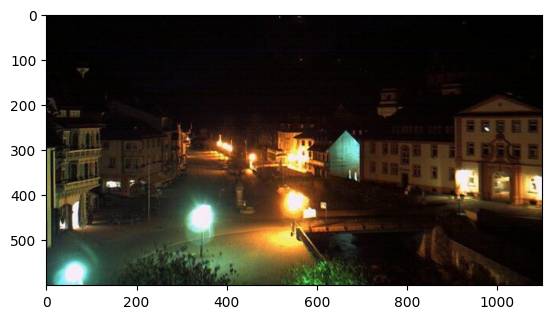

In [16]:
# Get feature based on average brightness using HSV colorspace
def avg_brightness(image):
    # Convert image to HSV
    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Calculate the avg of brightness
    sum_brightness = np.sum(img_hsv[:,:,2]) # take the 3rb value which is the V channel
    area = image.shape[0] * image.shape[1]
    avg = sum_brightness / area

    return avg

# Check on random image
rand_img = np.random.randint(0, len(train_std_img_list))

feature_img = train_std_img_list[rand_img][0]

avg_img = avg_brightness(feature_img)

print(f'Image {rand_img}')
print(f'Avg Brighness: {avg_img:.4f}')
plt.imshow(feature_img)

## Langkah 5 - Klasifikasi dengan Metode Threshold

Image 75
Actual label: 1
Predicted label: 0


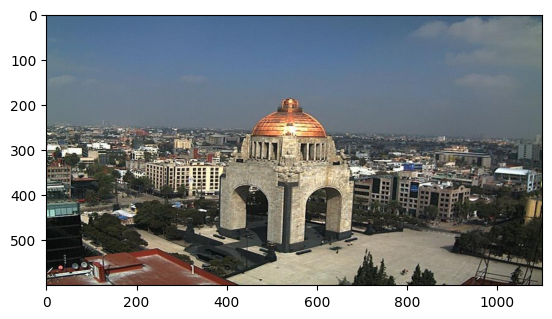

In [18]:
def predict_label(img, threshold):
    # Computer average brightness
    avg = avg_brightness(img)
    pred = 0

    # Predict the label based on user defined threshold
    if avg > threshold:
        pred = 1

    return pred

# Test the classifier on train data
rand_img = np.random.randint(0, len(train_std_img_list))

pred = predict_label(train_std_img_list[rand_img][0], threshold=120)

# Evaluate
print(f'Image {rand_img}')
print(f'Actual label: {train_std_img_list[rand_img][1]}')
print(f'Predicted label: {pred}')
plt.imshow(train_std_img_list[rand_img][0])

## Langkah 6 - Evaluasi Manual

In [21]:
def evaluate(img_list, threshold):
    miss_labels = []

    for file in img_list:
        # Get the ground truth / correct label
        img = file[0]
        label = file[1]

        # Get prediction
        pred_label = predict_label(img, threshold)

        # Compare ground truth and pred
        if pred_label != label:
            miss_labels.append((img, pred_label, label))

    total_img = len(img_list)
    corr_pred = total_img - len(miss_labels)
    accuracy = corr_pred / total_img

    print(f'Accuracy: {accuracy:.4f}')

# Evaluate on train data
evaluate(train_std_img_list, threshold=120)

# Evaluate on test data

# Load test data
test_img = load_dataset(test_dir)

# Preprocess
test_std_img_list = preprocess(test_img)

# Predict
evaluate(test_std_img_list, threshold=120)

Accuracy: 0.8417
Accuracy: 0.8688


# Tugas Praktikum

In [22]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load dataset voice.csv
# df = pd.read_csv('voice.csv')

# Untuk contoh, buat data dummy
def create_voice_dummy_data():
    np.random.seed(42)
    n_samples = 1000
    n_features = 20

    X = np.random.randn(n_samples, n_features)
    # Buat target yang bergantung pada fitur
    y = (X[:, 0] + X[:, 1] * 0.5 + np.random.randn(n_samples) * 0.1) > 0
    y = y.astype(int)

    return X, y

X, y = create_voice_dummy_data()

# Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Eksperimen dengan berbagai rasio split dan kernel
results = []

for test_size in [0.3, 0.2]:
    for kernel in ['linear', 'poly', 'rbf']:
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(
            X_scaled, y, test_size=test_size, random_state=42, stratify=y
        )

        # Training model
        if kernel == 'poly':
            model = SVC(kernel=kernel, degree=3)
        else:
            model = SVC(kernel=kernel)

        model.fit(X_train, y_train)

        # Prediksi dan evaluasi
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        results.append({
            'Split Ratio': f"{int((1-test_size)*100)}:{int(test_size*100)}",
            'Kernel': kernel,
            'Accuracy': accuracy
        })

# Tampilkan hasil
results_df = pd.DataFrame(results)
print("\nHasil Klasifikasi voice.csv:")
print(results_df)

# Tampilkan hasil terbaik
best_result = results_df.loc[results_df['Accuracy'].idxmax()]
print(f"\nHasil terbaik:")
print(f"Split Ratio: {best_result['Split Ratio']}")
print(f"Kernel: {best_result['Kernel']}")
print(f"Akurasi: {best_result['Accuracy']:.4f}")


Hasil Klasifikasi voice.csv:
  Split Ratio  Kernel  Accuracy
0       70:30  linear  0.976667
1       70:30    poly  0.880000
2       70:30     rbf  0.926667
3       80:20  linear  0.965000
4       80:20    poly  0.900000
5       80:20     rbf  0.930000

Hasil terbaik:
Split Ratio: 70:30
Kernel: linear
Akurasi: 0.9767


In [25]:
# Ekstrak fitur histogram RGB 8x8x8 → 512 fitur
def extract_histogram(image):
    histogram = cv2.calcHist(
        [image],
        [0, 1, 2],         # RGB channels
        None,
        [8, 8, 8],         # bins
        [0, 256, 0, 256, 0, 256]
    )
    histogram = cv2.normalize(histogram, histogram).flatten()
    return histogram
# Membuat dataset fitur histogram
def build_feature_dataset(std_img_list):
    X = []
    y = []

    for item in std_img_list:
        image = item[0]
        label = item[1]

        hist = extract_histogram(image)
        X.append(hist)
        y.append(label)

    return np.array(X), np.array(y)

# Data training
X_train, y_train = build_feature_dataset(train_std_img_list)

# Data testing
X_test, y_test = build_feature_dataset(test_std_img_list)

# Gabungkan ulang train + test untuk split mandiri 80:20
full_X = np.concatenate((X_train, X_test), axis=0)
full_y = np.concatenate((y_train, y_test), axis=0)

from sklearn.model_selection import train_test_split

X_tr, X_te, y_tr, y_te = train_test_split(
    full_X, full_y, test_size=0.20, random_state=42, stratify=full_y
)

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_tr, y_tr)

pred_rbf = svm_rbf.predict(X_te)
acc_rbf = accuracy_score(y_te, pred_rbf)

print("Akurasi SVM RBF (default):", acc_rbf)

best_acc = 0
best_params = {}

C_values = [1, 5, 10, 20, 50]
gamma_values = [0.001, 0.01, 0.1, 1]

for C in C_values:
    for gamma in gamma_values:
        model = SVC(kernel='rbf', C=C, gamma=gamma)
        model.fit(X_tr, y_tr)

        pred = model.predict(X_te)
        acc = accuracy_score(y_te, pred)

        print(f"C={C}, gamma={gamma}, Acc={acc:.4f}")

        if acc > best_acc:
            best_acc = acc
            best_params = {"C": C, "gamma": gamma}

print("\nAkurasi Terbaik:", best_acc)
print("Parameter Terbaik:", best_params)


Akurasi SVM RBF (default): 0.9875
C=1, gamma=0.001, Acc=0.8750
C=1, gamma=0.01, Acc=0.8625
C=1, gamma=0.1, Acc=0.9750
C=1, gamma=1, Acc=0.9875
C=5, gamma=0.001, Acc=0.8750
C=5, gamma=0.01, Acc=0.9500
C=5, gamma=0.1, Acc=0.9875
C=5, gamma=1, Acc=0.9875
C=10, gamma=0.001, Acc=0.8625
C=10, gamma=0.01, Acc=0.9750
C=10, gamma=0.1, Acc=0.9875
C=10, gamma=1, Acc=0.9875
C=20, gamma=0.001, Acc=0.8875
C=20, gamma=0.01, Acc=0.9875
C=20, gamma=0.1, Acc=0.9875
C=20, gamma=1, Acc=0.9875
C=50, gamma=0.001, Acc=0.9500
C=50, gamma=0.01, Acc=0.9875
C=50, gamma=0.1, Acc=0.9875
C=50, gamma=1, Acc=0.9875

Akurasi Terbaik: 0.9875
Parameter Terbaik: {'C': 1, 'gamma': 1}
